# Titanic dataset - Survival Prediction

The Titanic dataset provides observations for each passenger and the survival outcome. The problem statement entails predicting whether a passenger would survive or not survive given the features such as passenger class, sex, fair, age, number of siblings/spouse aboard, number of parents/children aboard, and others.

### About the data

- PassengerId : Id of the passenger
- Survived : weather the passenger surviced the disaster
- Pclass : Ticket class of the passenger
- Name : Name of the passenger
- Sex : Gender of the passenger
- Age : Age of the passenger
- SibSp : Number of siblings / spouses aboard the Titanic with the passenger
- Parch : Number of parents / children aboard the Titanic with the passenger
- Ticket : Ticket number of the passenger
- Fare : Passenger fare of the passenger
- Cabin : Cabin number of the passenger
- Embarked : Port of Embarkation of the passenger where C = Cherbourg, Q = Queenstown, S = Southampton

### Importing the data

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv(r'C:\Users\User\Desktop\Projects\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Ticket is a mix of numeric and alphaumeric datatypes
- Scope of typo errors in the Nam column

In [2]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 38 percent passengers are survived out of 891.
- average age of passengers onboard is 29.7
- average fare is around 32.20
- 52% people were accompanied by their spouse and or siblings aboard
- 38% people were accompanied by their parent and or children aboard
- Fare column contains skewed data since mean>median
- The column fare has Outliers

In [7]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Andrews, Miss. Kornelia Theodosia",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


- Names are unique across the dataset (count = unique = 891)
- Sex variable has two possible values with 65% male (as freq = 577)
- Cabin values have several dupicates 
- Embarked takes three possible values. S port used by most passengers (top = S)
- Ticket feature has high duplicate values (unique = 681).

In [8]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Decisions
- 'Survived' is the target column/variable.
- 'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.
- As there are a lot of missing values in the column 'Cabin', we can drop it from the training data.

# EDA

### Target Variable

In [9]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

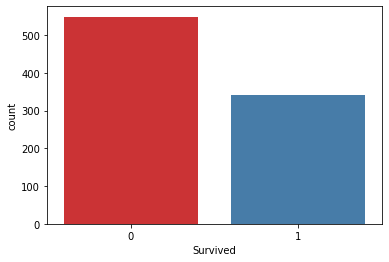

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='Survived', palette='Set1')

### Embarked

In [11]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

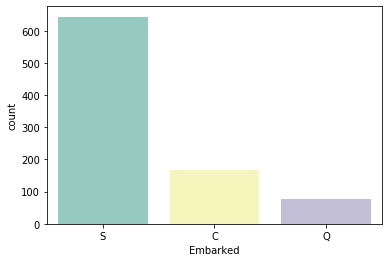

In [12]:
sns.countplot(data=df, x='Embarked', palette='Set3')

### Sibling / Spouse

In [13]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

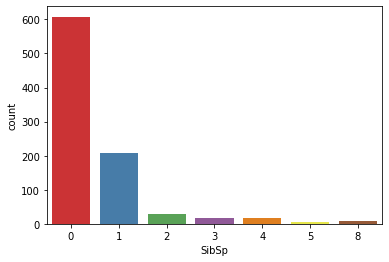

In [14]:
sns.countplot(data=df, x='SibSp', palette='Set1')

### Parent / Children 

In [15]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

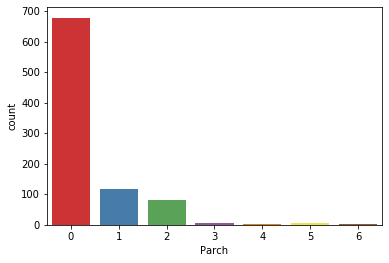

In [16]:
sns.countplot(data=df, x='Parch', palette='Set1')

Most of the passengers are not travelling with their children or parents

### Fare

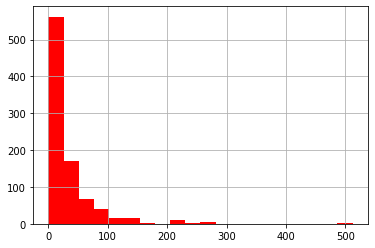

In [17]:
df.Fare.hist(bins=20, color='red')

### Pclass

In [18]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

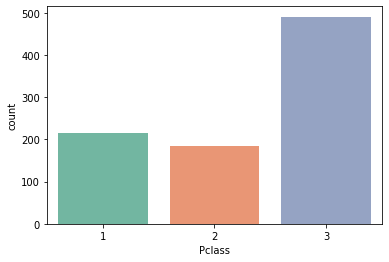

In [19]:
sns.countplot(data=df, x='Pclass', palette='Set2')

### Correlating categorical variables with target variable

In [20]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


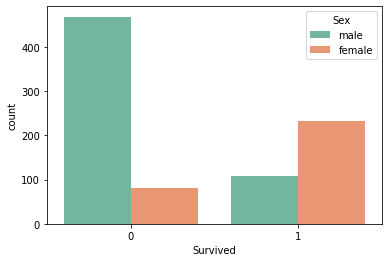

In [21]:
sns.countplot(data=df, x='Survived', hue='Sex', palette='Set2')

Females are more probable to survive

In [22]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived')

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


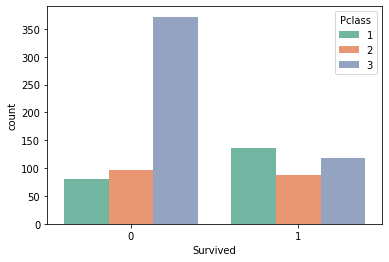

In [23]:
sns.countplot(data=df, x='Survived', hue='Pclass', palette='Set2')

Class 1 passengers are more likely to survive

In [24]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived')

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


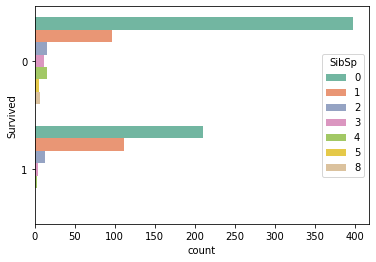

In [25]:
sns.countplot(data=df, y='Survived', hue='SibSp', palette='Set2')

Passengers with no siblings or a partner are very likely to not survive

In [26]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived')

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


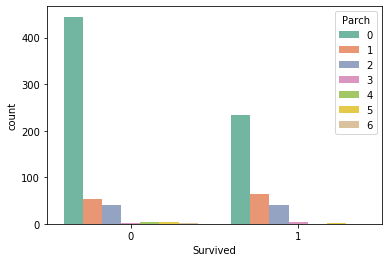

In [27]:
sns.countplot(data=df, x='Survived', hue='Parch', palette='Set2')

Passengers with no children are very likely to not survive

### Correlating numerical variables with target variable

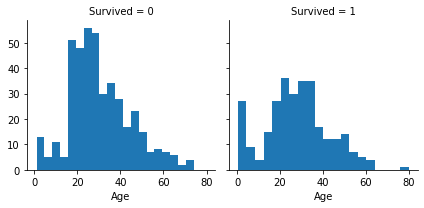

In [28]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

The age of the youngest person to survives is 1 and oldest is 80

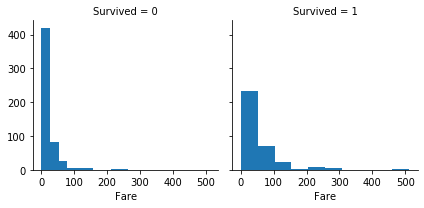

In [29]:
h = sns.FacetGrid(df, col='Survived')
h.map(plt.hist, 'Fare', bins=10)

### Processing the 'Name' Variable
Extarct title from name of the passenger and categorize them.
Drop the column 'Name'

Helps in acknowledging weather a passengers marital status plays a role in survival

In [30]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [31]:
df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Countess      1
Ms            1
Capt          1
Lady          1
Mme           1
Jonkheer      1
Sir           1
Name: Title, dtype: int64

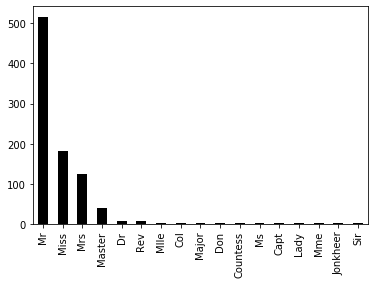

In [32]:
df.Title.value_counts().plot(kind='bar', color = 'black')

In [33]:
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace('Mlle', 'Miss')

Text(0, 0.5, 'Passenger count')

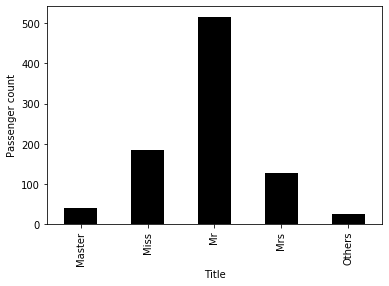

In [34]:
plt = df.Title.value_counts().sort_index().plot(kind = 'bar', color = 'black')
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

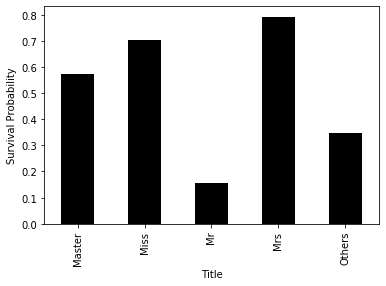

In [35]:
plt = df[['Title', 'Survived']].groupby('Title').mean().Survived.plot(kind = 'bar', color = 'black')
plt.set_xlabel('Title')
plt.set_ylabel('Survival Probability')

The survival probability for 'Mrs' and 'Miss' is high comapred to other classes. 

Married women are more likely to survive than unmarried females.

Unmarried men are more likely to survive than married one's.

### Dropping Columns 

In [36]:
df = df.drop(['Ticket','Cabin','PassengerId','Name'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


### Handling Missing Values

In [37]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

### Embarked

In [38]:
df.Embarked.unique() 

array(['S', 'C', 'Q', nan], dtype=object)

In [39]:
df['Embarked'] = df['Embarked'].replace(np.nan, 'X') 

In [40]:
df.Embarked.unique()

array(['S', 'C', 'Q', 'X'], dtype=object)

### Age

In [41]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')

df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))

In [42]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

### Mapping Categorical variables to numerical values

### Mapping 'Title'

In [43]:
df['Title'] = df['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,2


### Mapping 'Sex'

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,2
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,1
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,2


### Mapping 'Embarked'

In [45]:
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2, 'X':4}).astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,2
1,1,1,0,38.0,1,0,71.2833,1,3
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,3
4,0,3,1,35.0,0,0,8.0500,0,2


### Checking for Skewness

In [46]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.728737
Title      -0.047633
dtype: float64

Skewness is very high in SibSp, Parch, Embarked and Fare

In [47]:
for col in df.columns:
    if df.skew().loc[col]>0.75:
        df[col]=np.log1p(df[col])

In [48]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.657753
SibSp       1.661245
Parch       1.675439
Fare        0.394928
Embarked    1.278767
Title      -0.047633
dtype: float64

### Correlation 

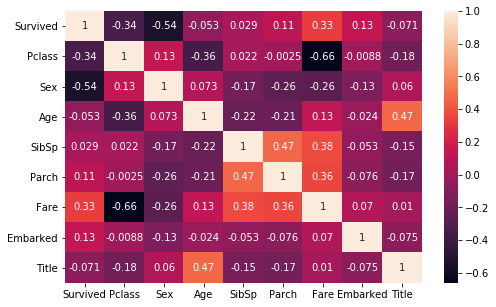

In [49]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
correlation = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation,annot= True)

None of the variables are behaving negatively with the target variable hence no need of any changes

# Model Building

In [50]:
x = df.drop(columns=['Survived'])
y = df[['Survived']]

In [51]:
x.shape, y.shape

((891, 8), (891, 1))

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=47)

In [54]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((694, 8), (197, 8), (694, 1), (197, 1))

In [55]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

## Logistic Regression

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
lg = LogisticRegression()
lg.fit(train_x, train_y)
pred = lg.predict(test_x)
log = accuracy_score(test_y,pred)*100

print('accuracy score:', log)
print('\n')
print (confusion_matrix(test_y,pred))
print('\n')
print (classification_report(test_y,pred))

accuracy score: 77.66497461928934


[[101  19]
 [ 25  52]]


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       120
           1       0.73      0.68      0.70        77

    accuracy                           0.78       197
   macro avg       0.77      0.76      0.76       197
weighted avg       0.77      0.78      0.77       197



### AUC_ROC Curve

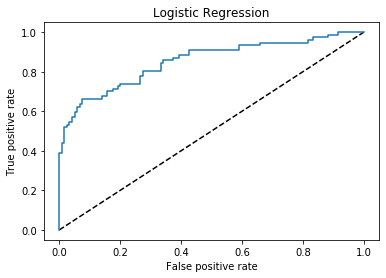

0.758495670995671

In [58]:
y_pred_prob = lg.predict_proba(test_x)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

auc_score = roc_auc_score(test_y,lg.predict(test_x))
auc_score

## Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
predgnb= gnb.predict(test_x)
gaussian = accuracy_score(test_y,predgnb)*100

print('accuracy score:',gaussian)
print('\n')
print(confusion_matrix(test_y, predgnb))
print('\n')
print(classification_report(test_y, predgnb))

accuracy score: 79.18781725888326


[[94 26]
 [15 62]]


              precision    recall  f1-score   support

           0       0.86      0.78      0.82       120
           1       0.70      0.81      0.75        77

    accuracy                           0.79       197
   macro avg       0.78      0.79      0.79       197
weighted avg       0.80      0.79      0.79       197



### AUC_ROC Curve

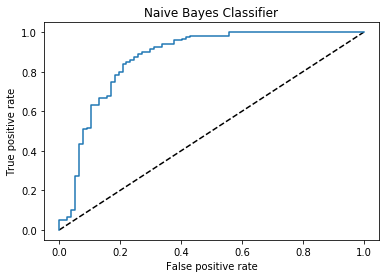

0.7942640692640692

In [60]:
y_pred_prob = gnb.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Naive Bayes Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Naive Bayes Classifier')
plt.show()

auc_score = roc_auc_score(test_y,gnb.predict(test_x))
auc_score

## SVM - GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
from sklearn.svm import SVC
from sklearn import svm, datasets

parameters = {'kernel':['linear','rbf'], 'C':[1,5,10]}
svc = SVC()
clf = GridSearchCV(svc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [63]:
svc=SVC(kernel='rbf', C=1, probability=True)
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
svcs = accuracy_score(test_y, predsvc)*100

print('accuracy score:',svcs)
print('\n')
print(confusion_matrix(test_y, predsvc))
print('\n')
print(classification_report(test_y, predsvc))

accuracy score: 84.77157360406092


[[112   8]
 [ 22  55]]


              precision    recall  f1-score   support

           0       0.84      0.93      0.88       120
           1       0.87      0.71      0.79        77

    accuracy                           0.85       197
   macro avg       0.85      0.82      0.83       197
weighted avg       0.85      0.85      0.84       197



### AUC_ROC Curve

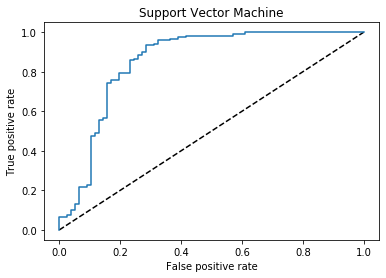

0.8238095238095239

In [64]:
y_pred_prob = svc.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Machine')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Support Vector Machine')
plt.show()

auc_score = roc_auc_score(test_y,svc.predict(test_x))
auc_score

## Decision Tree - GridSearchCV

In [65]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini','entropy']}
dtc =DecisionTreeClassifier()
clf = GridSearchCV(dtc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'entropy'}


In [66]:
dtc =DecisionTreeClassifier(criterion='entropy')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
decision_e = accuracy_score(test_y, preddtc)*100

print('accuracy score:',decision_e )
print('\n')
print(confusion_matrix(test_y, preddtc))
print('\n')
print(classification_report(test_y, preddtc))

accuracy score: 76.6497461928934


[[100  20]
 [ 26  51]]


              precision    recall  f1-score   support

           0       0.79      0.83      0.81       120
           1       0.72      0.66      0.69        77

    accuracy                           0.77       197
   macro avg       0.76      0.75      0.75       197
weighted avg       0.76      0.77      0.76       197



### AUC_ROC Curve

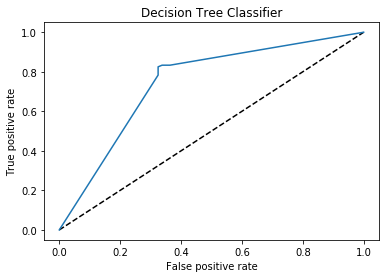

0.747835497835498

In [67]:
y_pred_prob = dtc.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score = roc_auc_score(test_y,dtc.predict(test_x))
auc_score

## RandomForest - GridSearchCV

In [68]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [100,300,500],'random_state': [40,45,50,55,60,65,70,75]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'n_estimators': 100, 'random_state': 40}


In [69]:
rf = RandomForestClassifier(n_estimators=100,random_state=40)
rf.fit(train_x,train_y)
predrf = rf.predict(test_x)
random = accuracy_score(test_y,predrf)*100

print('accuracy score:',random)
print('\n')
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

accuracy score: 78.1725888324873


[[102  18]
 [ 25  52]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       120
           1       0.74      0.68      0.71        77

    accuracy                           0.78       197
   macro avg       0.77      0.76      0.77       197
weighted avg       0.78      0.78      0.78       197



### AUC_ROC Curve

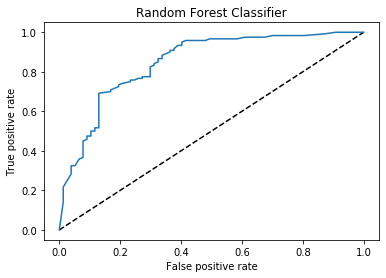

0.7626623376623376

In [70]:
y_pred_prob = rf.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score = roc_auc_score(test_y,rf.predict(test_x))
auc_score

## KNN - GridSearchCV

In [71]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [5,10,15,20,25,30]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'n_neighbors': 10}


In [72]:
knn = KNeighborsClassifier(n_neighbors =10)
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
predknn = knn.predict(test_x)
knn_a = accuracy_score(test_y, predknn)*100

print('accuracy score:',knn_a)
print('\n')
print(confusion_matrix(test_y, predknn))
print('\n')
print(classification_report(test_y, predknn))

accuracy score: 82.74111675126903


[[109  11]
 [ 23  54]]


              precision    recall  f1-score   support

           0       0.83      0.91      0.87       120
           1       0.83      0.70      0.76        77

    accuracy                           0.83       197
   macro avg       0.83      0.80      0.81       197
weighted avg       0.83      0.83      0.82       197



### AUC_ROC Curve

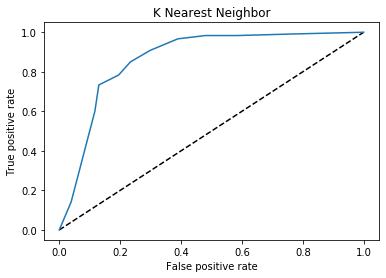

0.8048160173160173

In [73]:
y_pred_prob = knn.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='K Nearest Neighbor')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('K Nearest Neighbor')
plt.show()

auc_score = roc_auc_score(test_y,knn.predict(test_x))
auc_score

### Picking the best model

In [74]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', ' Gaussian Naive Bayes',
              'Decision Tree'],
    'Score': [svcs,knn_a,log,random,gaussian,decision_e]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,84.771574
1,KNN,82.741117
4,Gaussian Naive Bayes,79.187817
3,Random Forest,78.172589
2,Logistic Regression,77.664975
5,Decision Tree,76.649746


## Saving the best model

In [75]:
import pickle

filename = 'titanic.pkl'
pickle.dump(svc, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

loaded_model.predict(test_x)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)